In [1]:
import os
import json
import time
import math
import matplotlib.pyplot as plt
import numpy as np
from core.data_processor import DataLoader
from core.model import Model
from keras.utils.vis_utils import plot_model

In [2]:

# 绘图展示结果
def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.grid()
    plt.show()
    #plt.savefig('results_2.png')


def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.legend()
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
    plt.grid()
    plt.show()
    #plt.savefig('results_multiple_2.png')
    
def plot_results_multiple_onlypre(predicted_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    #ax.plot(true_data, label='True Data')
    plt.legend()
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
    plt.grid()
    plt.show()
    #plt.savefig('results_multiple_2.png')

In [3]:

#读取所需参数
configs = json.load(open('640-80-5-layers-multi.json', 'r'))
if not os.path.exists(configs['model']['save_dir']): os.makedirs(configs['model']['save_dir'])
#读取数据
data = DataLoader(
    os.path.join('data', configs['data']['visual_filename']),# change here to get the test dataset.
    configs['data']['visualization_full_split'], # change the train_test_split value to load the full audio file as an input.
    configs['data']['visual_filename_columns']
)

In [4]:

#创建RNN模型
model = Model()
mymodel = model.build_model(configs)

model_path = '/home/shh/Desktop/LSTM_Final/saved_models/(multi_640_80_64epo_5layers)21022023-231205-e100.h5'
model.load_model(filepath = model_path)
#plot_model(mymodel, to_file='model.png',show_shapes=True)

[Model] Model Compiled
Time taken: 0:00:00.360265
[Model] Loading model from file /home/shh/Desktop/LSTM_Final/saved_models/(multi_640_80_64epo_5layers)21022023-231205-e100.h5


In [5]:
# get_weights() can check all the weights of the trained model, in case the model learned nothing
model.model.get_weights()

[array([[-0.1037297 , -0.17919952, -0.6214466 , ..., -0.10864618,
         -0.386249  ,  0.04877383],
        [-0.18177839,  0.08509388, -0.12229315, ...,  0.0117965 ,
          0.14991175, -0.06671755],
        [-0.18514936, -0.09495095, -0.30194962, ...,  0.01728173,
          0.17632322,  0.13213767],
        ...,
        [-0.02801911, -0.13796915,  0.01769003, ...,  0.01154506,
         -0.25128427,  0.06984939],
        [-0.09874059,  0.02558841, -0.169912  , ..., -0.04651806,
          0.28111503, -0.05204576],
        [ 0.07754691, -0.15855469,  0.08519641, ..., -0.11944588,
         -0.01569251,  0.03738707]], dtype=float32),
 array([[ 0.03017936, -0.2797759 ,  0.0031727 , ..., -0.15763535,
          0.04890595, -0.11561441],
        [ 0.1923042 ,  0.40209243, -0.02180921, ...,  0.12100098,
          0.24615099,  0.13427368],
        [ 0.06883164,  0.17884602, -0.07244148, ..., -0.07099652,
         -0.10486077,  0.11039686],
        ...,
        [-0.06243081, -0.11563356, -0.0

In [5]:

#测试结果
x_test, y_test = data.get_test_data(
    seq_len=configs['data']['sequence_length'],
    normalise=False
    #normalise=configs['data']['normalise']
)

In [6]:
x_test

array([[[ 5.49316406e-04,  5.49316406e-04,  5.49316406e-04, ...,
          5.49316406e-04,  5.49316406e-04,  5.49316406e-04],
        [ 2.25830078e-03,  2.25830078e-03,  2.25830078e-03, ...,
          2.25830078e-03,  2.25830078e-03,  2.25830078e-03],
        [-9.76562500e-04, -9.76562500e-04, -9.76562500e-04, ...,
         -9.76562500e-04, -9.76562500e-04, -9.76562500e-04],
        ...,
        [ 4.58068848e-02,  4.58068848e-02,  4.58068848e-02, ...,
          4.58068848e-02,  4.58068848e-02,  4.58068848e-02],
        [-3.31420898e-02, -3.31420898e-02, -3.31420898e-02, ...,
         -3.31420898e-02, -3.31420898e-02, -3.31420898e-02],
        [ 3.00903320e-02,  3.00903320e-02,  3.00903320e-02, ...,
          3.00903320e-02,  3.00903320e-02,  3.00903320e-02]],

       [[ 2.25830078e-03,  2.25830078e-03,  2.25830078e-03, ...,
          2.25830078e-03,  2.25830078e-03,  2.25830078e-03],
        [-9.76562500e-04, -9.76562500e-04, -9.76562500e-04, ...,
         -9.76562500e-04, -9.76562500e

# predict - 5layers is the best until now


In [7]:
# prediction part
predictions_multiseq_1 = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=1,debug=False)


[Model] Predicting Sequences Multiple...


In [8]:
predictions_multiseq_2 = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=2,debug=False)

[Model] Predicting Sequences Multiple...


In [9]:
predictions_multiseq_4 = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=4,debug=False)

[Model] Predicting Sequences Multiple...


In [10]:
predictions_multiseq_8 = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=8,debug=False)

[Model] Predicting Sequences Multiple...


In [11]:
predictions_multiseq_16 = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=16,debug=False)

[Model] Predicting Sequences Multiple...


In [12]:
predictions_multiseq_32 = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=32,debug=False)

[Model] Predicting Sequences Multiple...


In [13]:
predictions_multiseq_48 = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=48,debug=False)

[Model] Predicting Sequences Multiple...


In [14]:
predictions_multiseq_64 = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=64,debug=False)

[Model] Predicting Sequences Multiple...


In [15]:
predictions_multiseq_80 = model.predict_sequences_multiple(data=x_test, window_size=640, prediction_len=80, debug=False)

[Model] Predicting Sequences Multiple...


In [9]:
predictions_multiseq_1

[[0.31638595],
 [0.2115429],
 [0.10985958],
 [0.035144906],
 [-0.074211895],
 [-0.18058601],
 [-0.27304748],
 [-0.30625555],
 [-0.34138513],
 [-0.37016866],
 [-0.4010504],
 [-0.40193993],
 [-0.37965626],
 [-0.31400666],
 [-0.23494124],
 [-0.14077383],
 [-0.07125023],
 [-0.022993483],
 [0.029460287],
 [0.109078586],
 [0.15104231],
 [0.19218701],
 [0.22265244],
 [0.24869922],
 [0.25719655],
 [0.28837907],
 [0.27976394],
 [0.25539517],
 [0.18334398],
 [0.1498827],
 [0.098182335],
 [0.06187943],
 [0.00062637776],
 [-0.070724994],
 [-0.15532449],
 [-0.20526573],
 [-0.24008709],
 [-0.2569228],
 [-0.26803398],
 [-0.24381152],
 [-0.22034848],
 [-0.1813937],
 [-0.13946477],
 [-0.075822815],
 [-0.038750254],
 [-0.0009968355],
 [0.04897187],
 [0.09535831],
 [0.11945315],
 [0.12113836],
 [0.113006175],
 [0.086264655],
 [0.06370745],
 [0.042346492],
 [0.023330368],
 [0.0017376989],
 [-0.037669048],
 [-0.0711044],
 [-0.10838072],
 [-0.122372985],
 [-0.14507991],
 [-0.13700469],
 [-0.14895767],
 [-0.

# CSV no (0,1) scaler
### no_scalar.csv

## (1) 1 points prediction

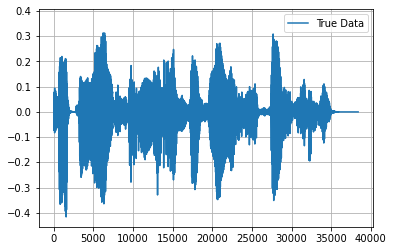

In [16]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq_1, y_test, prediction_len=1)

In [17]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

In [18]:
flat_predictions_multiseq_1 = flatten(predictions_multiseq_1)

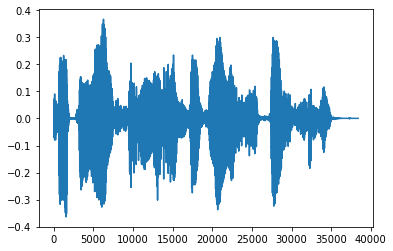

In [19]:
plt.plot(flat_predictions_multiseq_1)

In [20]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

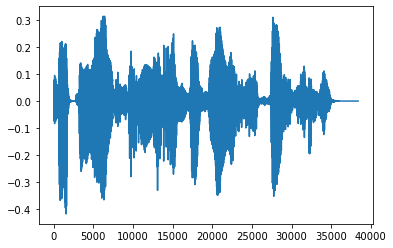

In [21]:
plt.plot(y_test_flatten)

In [22]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq_1, rate=16000)

In [23]:
# real
ipd.Audio(y_test_flatten, rate=16000)

In [24]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/mutil_speaker_results/multi_5layers-1-point-predicted_14468.wav", flat_predictions_multiseq_1, sr)

## (2) 2 points prediction

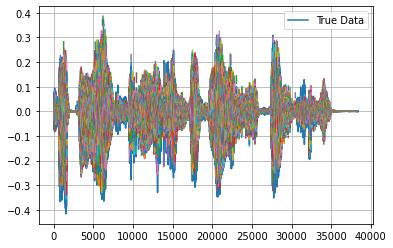

In [25]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq_2, y_test, prediction_len=2)

In [26]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

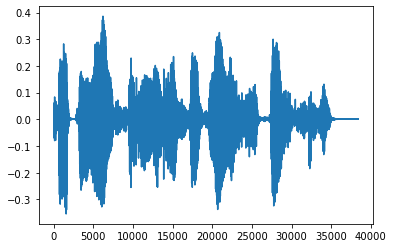

In [27]:
flat_predictions_multiseq_2 = flatten(predictions_multiseq_2)
plt.plot(flat_predictions_multiseq_2)

In [28]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

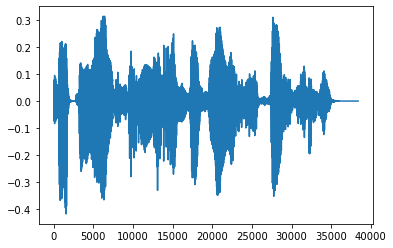

In [29]:
plt.plot(y_test_flatten)

In [30]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq_2, rate=16000)

In [31]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/mutil_speaker_results/multi_5layers-2-point-predicted_14468.wav", flat_predictions_multiseq_2, sr)

## (3) 4 points prediction

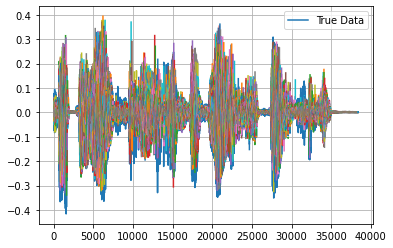

In [32]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq_4, y_test, prediction_len=4)

In [33]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

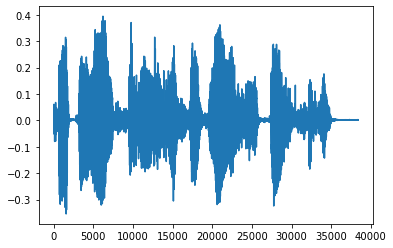

In [34]:
flat_predictions_multiseq_4 = flatten(predictions_multiseq_4)
plt.plot(flat_predictions_multiseq_4)

In [35]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

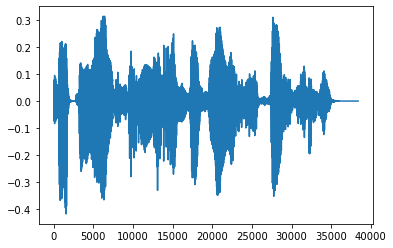

In [36]:
plt.plot(y_test_flatten)

In [37]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq_4, rate=16000)

In [38]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/mutil_speaker_results/multi_5layers-4-point-predicted_14468.wav", flat_predictions_multiseq_4, sr)

## (4) 8 points prediction

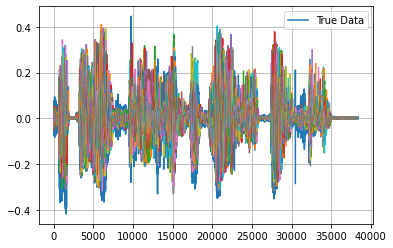

In [39]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq_8, y_test, prediction_len=8)

In [40]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

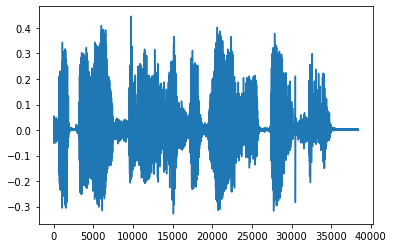

In [41]:
flat_predictions_multiseq_8 = flatten(predictions_multiseq_8)
plt.plot(flat_predictions_multiseq_8)

In [42]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

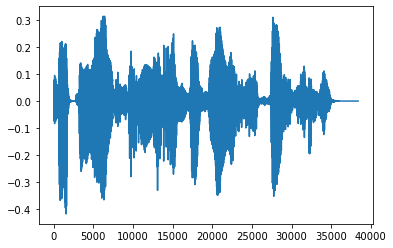

In [43]:
plt.plot(y_test_flatten)

In [44]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq_8, rate=16000)

In [45]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/mutil_speaker_results/multi_5layers-8-point-predicted_14468.wav", flat_predictions_multiseq_8, sr)

## (5) 16 points prediction

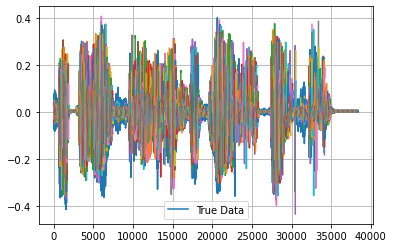

In [46]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq_16, y_test, prediction_len=16)

In [47]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

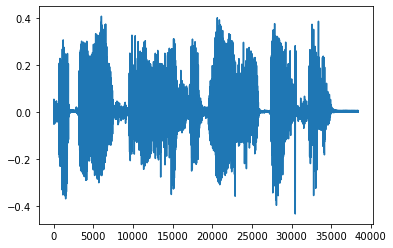

In [48]:
flat_predictions_multiseq_16 = flatten(predictions_multiseq_16)
plt.plot(flat_predictions_multiseq_16)

In [49]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

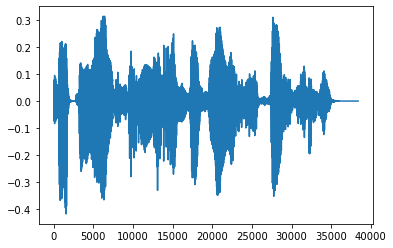

In [50]:
plt.plot(y_test_flatten)

In [51]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq_16, rate=16000)

In [52]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/mutil_speaker_results/multi_5layers-16-point-predicted_14468.wav", flat_predictions_multiseq_16, sr)

### 

## (6) 32 points prediction

/home/shh/anaconda3/envs/LSTM/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


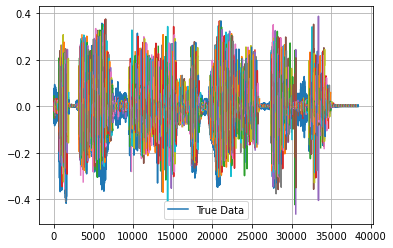

In [53]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq_32, y_test, prediction_len=32)

In [54]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

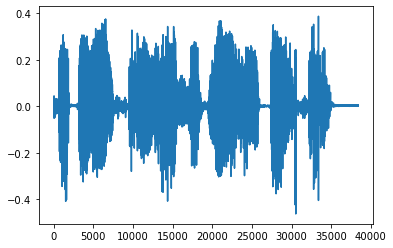

In [55]:
flat_predictions_multiseq_32 = flatten(predictions_multiseq_32)
plt.plot(flat_predictions_multiseq_32)

In [56]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

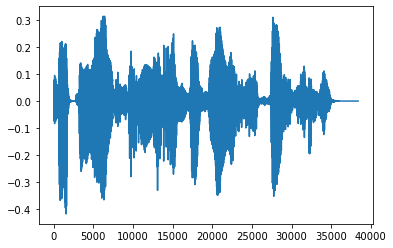

In [57]:
plt.plot(y_test_flatten)

In [58]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq_32, rate=16000)

In [59]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/mutil_speaker_results/multi_5layers-32-point-predicted_14468.wav", flat_predictions_multiseq_32, sr)

## (7) 48 points prediction

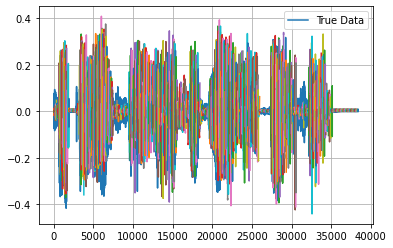

In [60]:
# no (0, 1) 
# no normalization
plot_results_multiple(predictions_multiseq_48, y_test, prediction_len=48)

In [61]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

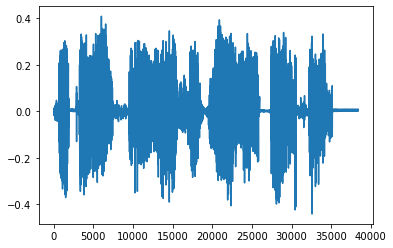

In [62]:
flat_predictions_multiseq_48 = flatten(predictions_multiseq_48)
plt.plot(flat_predictions_multiseq_48)

In [63]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

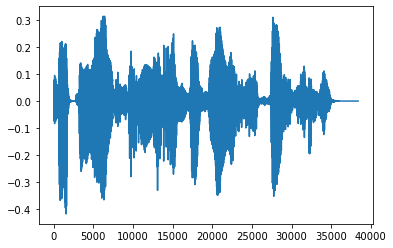

In [64]:
plt.plot(y_test_flatten)

In [65]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq_48, rate=16000)

In [66]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/mutil_speaker_results/multi_5layers-48-point-predicted_14468.wav", flat_predictions_multiseq_48, sr)

## (8) 64 points prediction

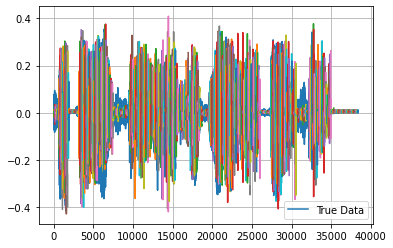

In [67]:
# no (0, 1)
# no normalization
plot_results_multiple(predictions_multiseq_64, y_test, prediction_len=64)

In [68]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

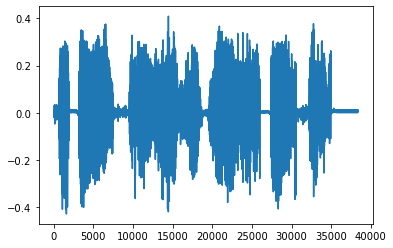

In [69]:
flat_predictions_multiseq_64 = flatten(predictions_multiseq_64)
plt.plot(flat_predictions_multiseq_64)

In [70]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

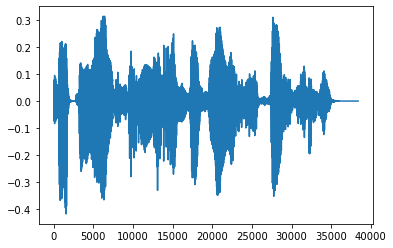

In [71]:
plt.plot(y_test_flatten)

In [72]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq_64, rate=16000)

In [73]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/mutil_speaker_results/multi_5layers-64-point-predicted_14468.wav", flat_predictions_multiseq_64, sr)

## (9) 80 points prediction (original)

/home/shh/anaconda3/envs/LSTM/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


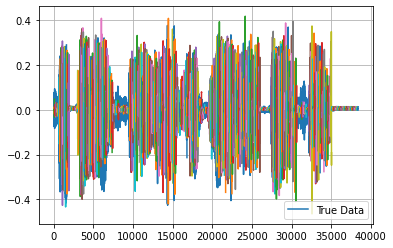

In [74]:
# no (0, 1)
# no normalization
plot_results_multiple(predictions_multiseq_80, y_test, prediction_len=80)

In [75]:
# this function is to flatten list object
# predictions_multiseq is list, so need to flatten to plot and hear
def flatten(l):
    return [item for sublist in l for item in sublist]

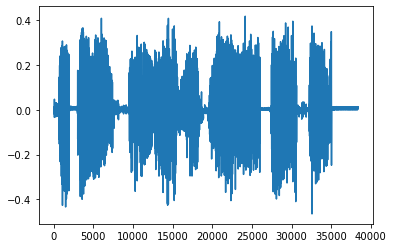

In [76]:
flat_predictions_multiseq_80 = flatten(predictions_multiseq_80)
plt.plot(flat_predictions_multiseq_80)

In [77]:
# real audio flatten to hear
y_test_flatten = np.array(y_test)
y_test_flatten = list(y_test_flatten.reshape(y_test_flatten.size,))
#y_test_flatten

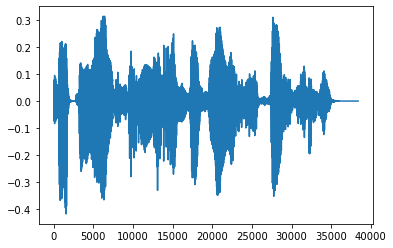

In [78]:
plt.plot(y_test_flatten)

In [79]:
import librosa, librosa.display
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd

# predict
ipd.Audio(flat_predictions_multiseq_80, rate=16000)

In [80]:
import soundfile as sf
sr = 16000
#sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/original.wav", y_test_flatten, sr)
sf.write("/home/shh/Desktop/LSTM_Final/audio_saved/mutil_speaker_results/multi_5layers-80-point-predicted_14468.wav", flat_predictions_multiseq_80, sr)